Скачачиваем библиотеки

In [13]:
!pip install dash pandas
!pip install seaborn

импортируем библиотеки

In [14]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

загружаем данные

In [15]:
expenses = pd.read_csv('expenses_new.csv')
orders = pd.read_csv('orders_new.csv')
visitation = pd.read_csv('visitation_new.csv')

In [34]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2022-05-01 23:09:52,4.99
1,174361394180,2022-05-01 12:24:04,4.99
2,529610067795,2022-05-01 11:34:04,4.99
3,319939546352,2022-05-01 15:34:40,4.99
4,366000285810,2022-05-01 13:59:51,4.99
...,...,...,...
39791,651604369137,2022-10-31 16:19:07,4.99
39792,275341387049,2022-10-31 01:17:17,4.99
39793,374656616484,2022-10-31 06:17:29,4.99
39794,168548862926,2022-10-31 22:46:19,4.99


In [16]:
expenses

,dt,Channel,costs
0,2022-05-01,MediaTornado,6.24
1,2022-05-02,MediaTornado,5.04
2,2022-05-03,MediaTornado,6.96
3,2022-05-04,MediaTornado,9.36
4,2022-05-05,MediaTornado,11.04
...,...,...,...
1443,2022-10-23,lambdaMediaAds,4.00
1444,2022-10-24,lambdaMediaAds,6.40
1445,2022-10-25,lambdaMediaAds,8.80
1446,2022-10-26,lambdaMediaAds,8.80


# 2.1 Построение дашборда

Создадим дашборд через pandas dash ведь он очень удобный и имеет много функций

In [118]:

app = dash.Dash(__name__)

diamonds = expenses

scatter = px.scatter(
   data_frame=diamonds,
   x="Channel",
   y="costs",
   color="dt",
   title="Channel vs. costs",
   width=600,
   height=400,
)
histogram = px.histogram(
   data_frame=diamonds,
   x="costs",
   title="Histogram of costs",
   width=600,
   height=400,
)
violin = px.violin(
   data_frame=diamonds,
   x="dt",
   y="costs",
   title="dt vs. costs",
   width=600,
   height=400,
)

left_fig = html.Div(children=dcc.Graph(figure=scatter))
right_fig = html.Div(children=dcc.Graph(figure=histogram))

upper_div = html.Div([left_fig, right_fig], style={"display": "flex"})
central_div = html.Div(
   children=dcc.Graph(figure=violin),
   style={"display": "flex", "justify-content": "center"},
)
app.layout = html.Div([upper_div, central_div])

if __name__ == "__main__":
   app.run_server(debug=True)

данный даш борд показывает многое

# 2.2 Исследовательский анализ данных в информационной панели

# 2.3 Создание профилей пользователей

Используем функцию которую сделали раньше

In [47]:
exoenses1 = orders.drop(columns=['User Id'])
exoenses2 = exoenses1.drop(columns=['Event Dt'])
e = expenses.drop(columns=['dt'])
e = e.drop(columns=['Channel'])
visitation1 = pd.concat([visitation, exoenses2,e], axis=1)
vis = visitation1.dropna()
vis

,User Id,Region,Device,Channel,Session Start,Session End,Revenue,costs
0,981449118918,Russia,iPhone,organic,2022-05-01 02:36:01,2022-05-01 02:45:01,4.99,6.24
1,278965908054,Russia,iPhone,organic,2022-05-01 04:46:31,2022-05-01 04:47:35,4.99,5.04
2,590706206550,Russia,Mac,organic,2022-05-01 14:09:25,2022-05-01 15:32:08,4.99,6.96
3,326433527971,Russia,Android,TipTop,2022-05-01 00:29:59,2022-05-01 00:54:25,4.99,9.36
4,349773784594,Russia,Mac,organic,2022-05-01 03:33:35,2022-05-01 03:57:40,4.99,11.04
...,...,...,...,...,...,...,...,...
1443,755840663757,Russia,iPhone,organic,2022-05-03 13:09:33,2022-05-03 13:12:34,4.99,4.00
1444,29210193047,Russia,iPhone,organic,2022-05-03 04:17:48,2022-05-03 04:21:43,4.99,6.40
1445,735968289275,Russia,Mac,FaceBoom,2022-05-03 05:35:24,2022-05-03 05:42:23,4.99,8.80
1446,40244695943,Russia,Android,organic,2022-05-03 00:48:42,2022-05-03 01:02:10,4.99,8.80


Посмотрим из каких стран приходят посетители и какие страны дают больше всего
платящих пользователей?

In [48]:
vis['Region'].value_counts()

Region
Russia    1448
Name: count, dtype: int64

Это оказалась Russia

Посмотрим какими устройствами они пользуются и с каких устройств чаще всего
заходят платящие пользователи?

In [49]:
vis['Device'].value_counts()

Device
iPhone     641
Mac        368
Android    294
PC         145
Name: count, dtype: int64

и этим устройством оказался iPhone

Посмотрим по каким рекламным каналам шло привлечение пользователей и какие каналы
приносят больше всего платящих пользователей?

In [50]:
vis['Channel'].value_counts()

Channel
organic           791
FaceBoom          222
TipTop            186
RocketSuperAds     93
YRabbit            90
MediaTornado       66
Name: count, dtype: int64

и этим каналом оказался organic

Создадим Dataframe с данными пользователей

In [51]:
user_data = vis.drop(columns=['Session Start'])
user_data = user_data.drop(columns=['Session End'])
user_data

,User Id,Region,Device,Channel,Revenue,costs
0,981449118918,Russia,iPhone,organic,4.99,6.24
1,278965908054,Russia,iPhone,organic,4.99,5.04
2,590706206550,Russia,Mac,organic,4.99,6.96
3,326433527971,Russia,Android,TipTop,4.99,9.36
4,349773784594,Russia,Mac,organic,4.99,11.04
...,...,...,...,...,...,...
1443,755840663757,Russia,iPhone,organic,4.99,4.00
1444,29210193047,Russia,iPhone,organic,4.99,6.40
1445,735968289275,Russia,Mac,FaceBoom,4.99,8.80
1446,40244695943,Russia,Android,organic,4.99,8.80


In [52]:
user_data.to_csv('user_data.csv',index=False)

# 2.4 Маркетинговый анализ

Посмотрим на среднее занчение 

In [53]:
user_data.describe()

,User Id,Revenue,costs
count,1.448000e+03,1448.000000,1448.000000
mean,5.018676e+11,5.059751,12.942265
std,2.895730e+11,0.521782,10.218084
min,2.346325e+09,4.990000,0.800000
25%,2.317173e+11,4.990000,5.757500
50%,5.112493e+11,4.990000,9.750000
75%,7.625050e+11,4.990000,16.380000
max,9.985130e+11,9.990000,60.000000


Посмотрим все расходы

In [54]:
user_data['costs'].sum()

18740.4

Посмотрим на все доходы 

In [105]:
user_data['Revenue'].sum()

7326.520000000002

## Общая окупаемость рекламы;

Вот так можно найти окупаемость рекламы 

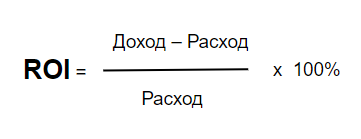

In [84]:
o = user_data['Revenue'].sum()
i = user_data['costs'].sum()
Roi = (o-i)/i*0.9
Roi

-0.5481468912082985

## Окупаемость рекламы с разбивкой по устройствам

Вычесляем все по этой функции 

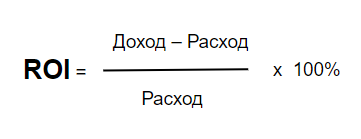

In [86]:
iPhone_r = user_data.loc[user_data['Device'].isin(['iPhone']), 'costs'].sum()
iPhone_r

8587.28

In [87]:
Mac_r = user_data.loc[user_data['Device'].isin(['Mac']), 'costs'].sum()
Mac_r

4536.53

In [88]:
Android_r = user_data.loc[user_data['Device'].isin(['Android']), 'costs'].sum()
Android_r

3875.45

In [89]:
PC_r = user_data.loc[user_data['Device'].isin(['PC']), 'costs'].sum()
PC_r

1741.1399999999999

In [94]:
iPhone_d = user_data.loc[user_data['Device'].isin(['iPhone']), 'Revenue'].sum()
iPhone_d

3244.590000000001

In [95]:
Mac_d = user_data.loc[user_data['Device'].isin(['Mac']), 'Revenue'].sum()
Mac_d

1845.3200000000006

In [96]:
Android_d = user_data.loc[user_data['Device'].isin(['Android']), 'Revenue'].sum()
Android_d

1499.0600000000004

In [97]:
PC_d = user_data.loc[user_data['Device'].isin(['PC']), 'Revenue'].sum()
PC_d

737.5500000000002

In [98]:
Roi_iPhone = (iPhone_d-iPhone_r)/iPhone_r*0.9
Roi_iPhone

-0.5599469214931853

In [99]:
Roi_Mac = (Mac_d-Mac_r)/Mac_r*0.9
Roi_Mac

-0.5339078546818823

In [100]:
Roi_Android = (Android_d-Android_r)/Android_r*0.9
Roi_Android

-0.5518716536144189

In [101]:
Roi_PC = (PC_d-PC_r)/PC_r*0.9
Roi_PC

-0.5187583996691821

## Окупаемость рекламы с разбивкой по странам;

Вычесляем все по этой функции

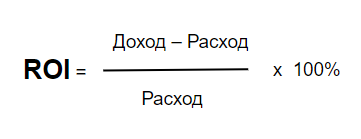

In [102]:
Russia_r = user_data.loc[user_data['Region'].isin(['Russia']), 'costs'].sum()
Russia_r

18740.4

In [103]:
Russia_d = user_data.loc[user_data['Region'].isin(['Russia']), 'Revenue'].sum()
Russia_d

7326.520000000002

In [104]:
Roi_Russia = (Russia_d-Russia_r)/Russia_r*0.9
Roi_Russia

-0.5481468912082985

## Окупаемость рекламы с разбивкой по рекламным каналам.

Вычесляем все по этой функции

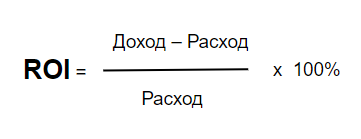

In [66]:
organic_r = user_data.loc[user_data['Channel'].isin(['organic']), 'costs'].sum()
organic_r

10167.439999999999

In [67]:
organic_d = user_data.loc[user_data['Channel'].isin(['organic']), 'Revenue'].sum()
organic_d

4013.090000000001

In [68]:
TipTop_r = user_data.loc[user_data['Channel'].isin(['TipTop']), 'costs'].sum()
TipTop_r

2472.22

In [69]:
TipTop_d = user_data.loc[user_data['Channel'].isin(['TipTop']), 'Revenue'].sum()
TipTop_d

942.1400000000002

In [70]:
FaceBoom_r = user_data.loc[user_data['Channel'].isin(['FaceBoom']), 'costs'].sum()
FaceBoom_r

2869.79

In [71]:
FaceBoom_d = user_data.loc[user_data['Channel'].isin(['FaceBoom']), 'Revenue'].sum()
FaceBoom_d

1119.7800000000002

In [72]:
RocketSuperAds_r = user_data.loc[user_data['Channel'].isin(['RocketSuperAds']), 'costs'].sum()
RocketSuperAds_r

1234.6249999999998

In [73]:
RocketSuperAds_d = user_data.loc[user_data['Channel'].isin(['RocketSuperAds']), 'Revenue'].sum()
RocketSuperAds_d

465.07000000000016

In [74]:
YRabbit_r = user_data.loc[user_data['Channel'].isin(['YRabbit']), 'costs'].sum()
YRabbit_r

1185.1549999999997

In [75]:
YRabbit_d = user_data.loc[user_data['Channel'].isin(['YRabbit']), 'Revenue'].sum()
YRabbit_d

451.10000000000014

In [76]:
MediaTornado_r = user_data.loc[user_data['Channel'].isin(['MediaTornado']), 'costs'].sum()
MediaTornado_r

811.17

In [77]:
MediaTornado_d = user_data.loc[user_data['Channel'].isin(['MediaTornado']), 'Revenue'].sum()
MediaTornado_d

335.3400000000001

In [78]:
Roi_organic = (organic_d-organic_r)/organic_r*0.9
Roi_organic

-0.5447698732424286

In [79]:
Roi_TipTop = (TipTop_d-TipTop_r)/TipTop_r*0.9
Roi_TipTop

-0.5570183883311354

In [80]:
Roi_FaceBoom = (FaceBoom_d-FaceBoom_r)/FaceBoom_r*0.9
Roi_FaceBoom

-0.5488237815310527

In [81]:
Roi_RocketSuperAds = (RocketSuperAds_d-RocketSuperAds_r)/RocketSuperAds_r*0.9
Roi_RocketSuperAds

-0.5609796496912016

In [82]:
Roi_YRabbit = (YRabbit_d-YRabbit_r)/YRabbit_r*0.9
Roi_YRabbit

-0.5574372128540147

In [83]:
Roi_MediaTornado = (MediaTornado_d-MediaTornado_r)/MediaTornado_r*0.9
Roi_MediaTornado

-0.5279374237212914

## Результаты

Реклама в любом случаи неокупалась на -0.50%

# 2.5 Подготовка отчета

В результате этой сессии были выполнены почти все задача

2.1 Построение дашборда
- Была построена Интерактивная информационная панель которая наглядно
представлять, визуализировать и анализировать данные. 
Аналитическая система
позволяет пользователю:


 автоматизировать работу с данными;


 анализировать все в реальном времени;


 видеть все главные метрики на одном экране;
 
легко считывать информацию и делать выводы

2.2 Исследовательский анализ данных в информационной панели
- Разработанная информационная панель позволяет пользователю
проводить анализ продуктовых метрик и показателей электронной коммерции.
были вычислены такие характеристики, как заинтересованность клиента
в продукте (DAU, WAU и MAU), количество времени, проведенное в
приложении, распределение привлеченных пользователей с разбивкой по
различным показателям(страна,устройство,канал,привлечения).
Аналитическая панель содержит анализ продаж для онлайн-торговли.

2.3 Создание профилей пользователей
- Используя ранее определенную функцию построен набор данных с профилями
пользователей. Было определено:


 Из каких стран приходят посетители? Какие страны дают больше всего
платящих пользователей? Russia


 Какими устройствами они пользуются? С каких устройств чаще всего
заходят платящие пользователи? iPhone

По каким рекламным каналам шло привлечение пользователей? Какие каналы
приносят больше всего платящих пользователей? organic

2.4 Маркетинговый анализ
- После проведения маркетингового анализа было расчитано:

Сколько денег потратили (всего / на каждый источник / по времени)?

Сколько в среднем стоило привлечение одного покупателя из каждого
источника?

Оценена окупаемость рекламы для привлечения пользователей. С помощью
ранее разработанных функций проанализированно:

Общую окупаемость рекламы;

Окупаемость рекламы с разбивкой по устройствам;

Окупаемость рекламы с разбивкой по странам;

Окупаемость рекламы с разбивкой по рекламным каналам.

2.5 Подготовка отчета
- Был подготовлен отчет о проделанной работе по итогам сессии, в котором
представлены результаты, выводы и обоснования выбора по каждому разделу
задания. Результаты работы состоят из отчетов в форматах: .ipynb и
.html, а также исходников с возможностью перекомпиляции. Архив Data.zip
содержит все результаты выполнения модуля, а также все необходимые
файлы для запуска и проверки участков кода. В файле Readme.txt
описано содержимое результирующих файлов архива Data.zip.